# EDA AIRLINES

In [0]:
from pyspark.sql.functions import col,isnan,when,count, lit
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, NullType, ShortType, DateType, BooleanType, BinaryType
from pyspark.sql import SQLContext
from pyspark.sql.window import Window
 
from math import radians, cos, sin, asin, sqrt
import matplotlib.pyplot as plt
import time
import numpy as np 
import pandas as pd
import seaborn as sns
from pytz import timezone 
from datetime import  datetime, timedelta 
import os
import networkx as nx
from delta.tables import DeltaTable
from copy import deepcopy

In [0]:
blob_container = "blobcontainer" # The name of your container created in https://portal.azure.com
storage_account = "w261section05group03" # The name of your Storage account created in https://portal.azure.com
secret_scope = "w261section05group04" # The name of the scope created in your local computer using the Databricks CLI
secret_key = "houseofthedragon" # The name of the secret key created in your local computer using the Databricks CLI 
blob_url = f"wasbs://{blob_container}@{storage_account}.blob.core.windows.net"
mount_path = "/mnt/mids-w261"

spark.conf.set(
  f"fs.azure.sas.{blob_container}.{storage_account}.blob.core.windows.net",
  dbutils.secrets.get(scope = secret_scope, key = secret_key)
)

In [0]:
data_BASE_DIR2 = "dbfs:/mnt/mids-w261/"
display(dbutils.fs.ls(f"{data_BASE_DIR2}/"))

path name size modificationTime dbfs:/mnt/mids-w261/HW5/ HW5/ 0 0 dbfs:/mnt/mids-w261/datasets_final_project/ datasets_final_project/ 0 0 dbfs:/mnt/mids-w261/datasets_final_project_2022/ datasets_final_project_2022/ 0 1656617686000

In [0]:
# Inspect the Mount's Final Project folder 
# Please IGNORE dbutils.fs.cp("/mnt/mids-w261/datasets_final_project/stations_data/", "/mnt/mids-w261/datasets_final_project_2022/stations_data/", recurse=True)

data_BASE_DIR = "dbfs:/mnt/mids-w261/datasets_final_project_2022/"
display(dbutils.fs.ls(f"{data_BASE_DIR}"))

path name size modificationTime dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_airlines_data/ parquet_airlines_data/ 0 1656618287000 dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_airlines_data_1y/ parquet_airlines_data_1y/ 0 1656630272000 dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_airlines_data_3m/ parquet_airlines_data_3m/ 0 1656630114000 dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_airlines_data_6m/ parquet_airlines_data_6m/ 0 1656630205000 dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_weather_data/ parquet_weather_data/ 0 1656622074000 dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_weather_data_1y/ parquet_weather_data_1y/ 0 1656631614000 dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_weather_data_3m/ parquet_weather_data_3m/ 0 1656630651000 dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_weather_data_6m/ parquet_weather_data_6m/ 0 1656631047000 dbfs:/mnt/mids-w261/datasets_final_project_2022/stations_data/ stations_data/ 0 1656713663000

In [0]:
display(dbutils.fs.ls(f"{data_BASE_DIR}stations_data/"))

path name size modificationTime dbfs:/mnt/mids-w261/datasets_final_project_2022/stations_data/stations_with_neighbors.parquet/ stations_with_neighbors.parquet/ 0 1656713664000

## Total Flight Dataset EDA

In [0]:

# df_airlines_full = spark.read.parquet(f"{data_BASE_DIR}parquet_airlines_data/")
# df_airlines_full.select("YEAR").distinct().show()

In [0]:
df_airlines_full = spark.read.parquet(f"{blob_url}/df_airlines_silver")
df_airlines_full.columns

Out[3]: ['QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'FL_DATE',
 'OP_UNIQUE_CARRIER',
 'OP_CARRIER_AIRLINE_ID',
 'TAIL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN',
 'ORIGIN_STATE_ABR',
 'DEST_AIRPORT_ID',
 'DEST',
 'DEST_STATE_ABR',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
 'ARR_DELAY_GROUP',
 'ARR_TIME_BLK',
 'CANCELLED',
 'DIVERTED',
 'DISTANCE',
 'DISTANCE_GROUP',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'YEAR',
 'ident',
 'type',
 'name',
 'elevation_ft',
 'continent',
 'iso_country',
 'iso_region',
 'municipality',
 'gps_code',
 'iata_code',
 'local_code',
 'coordinates',
 'tz',
 'FLIGHT_TIMESTAMP',
 'calc_dep_delay',
 'calc_arr_delay']

In [0]:
df_airlines_full.count(), len(df_airlines_full.columns)

Out[11]: (41451869, 54)

In [0]:
# origin_wac = df_airlines_full.select("ORIGIN_WAC").distinct()
# dest_wac = df_airlines_full.select("DEST_WAC").distinct()

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
<command-1013197717893227> in <cell line: 1>()
----> 1 origin_wac = df_airlines_full.select("ORIGIN_WAC").distinct()
      2 dest_wac = df_airlines_full.select("DEST_WAC").distinct()

/databricks/spark/python/pyspark/instrumentation_utils.py in wrapper(*args, **kwargs)
     46             start = time.perf_counter()
     47             try:
---> 48                 res = func(*args, **kwargs)
     49                 logger.log_success(
     50                     module_name, class_name, function_name, time.perf_counter() - start, signature

/databricks/spark/python/pyspark/sql/dataframe.py in select(self, *cols)
   2107         [Row(name='Alice', age=12), Row(name='Bob', age=15)]
   2108         """
-> 2109         jdf = self._jdf.select(self._jcols(*cols))
   2110         return DataFrame(jdf, self.sparkSession)
   2111 

/databricks/s

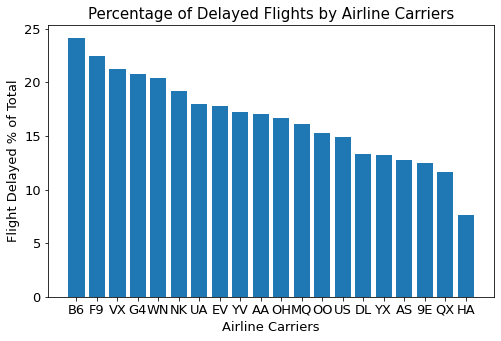

In [0]:
# airline carriers plot
df_carrier = df_airlines_full.groupBy("OP_UNIQUE_CARRIER","DEP_DEL15").count().toPandas()
df_carrier['delay_percent'] = np.where(df_carrier.DEP_DEL15 == 1, df_carrier['count'] * 100 / df_carrier.groupby('OP_UNIQUE_CARRIER')['count'].transform('sum'), 0)
df_carrier = df_carrier.sort_values(by='delay_percent',ascending=False)


fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(df_carrier['OP_UNIQUE_CARRIER'],df_carrier['delay_percent'])
plt.title("Percentage of Delayed Flights by Airline Carriers", fontdict = {'fontsize' : 15})
plt.xlabel("Airline Carriers", fontsize = 13)
plt.ylabel('Flight Delayed % of Total', fontsize = 13)
# plt.xticks(bins)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [0]:
display(dest_wac)

DEST_WAC 31 85 65 53 34 81 44 12 91 22 93 1 52 13 86 16 3 54 5 92 64 41 43 15 37 61 88 72 35 4 23 39 84 87 51 63 45 38 82 73 62 21 33 11 83 71 14 42 2 66 67 74 36

In [0]:
# Dimensions of 3 Month Data Set
df_airlines_full.count(), len(df_airlines_full.columns)

Out[8]: (42430592, 109)

## COMPUTE MISSING VALUE COUNTS/PCT TO DROP FEATURES

In [0]:
#try to view how many nulls are in each column for feature selection 
from pyspark.sql.functions import col,isnan,when,count, lit

df_Columns= df_airlines_full
df_airlines_missing_count = df_airlines_full.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_Columns.columns]
   ).toPandas().T
df_airlines_missing_count.rename(columns = {0:"Missing Values"}, inplace = True)

df_Columns= df_airlines_full
df_airlines_missing_pct = df_airlines_full.select([(count(when(isnan(c) | col(c).isNull(), c))*100/count(lit(1))).alias(c) for c in df_Columns.columns]
   ).toPandas().T
df_airlines_missing_pct.rename(columns = {0:"% of Total Values"}, inplace = True)

In [0]:
# Missing Values/ % Missing
df_airlines_missing = pd.concat([df_airlines_missing_count,df_airlines_missing_pct],axis = 1)
df_airlines_missing.sort_values(by ='% of Total Values', ascending=False )


Missing Values 
 % of Total Values 
 
 
 
 
 DIV4_TOTAL_GTIME 
 74177433 
 100.0 
 
 
 DIV5_AIRPORT_ID 
 74177433 
 100.0 
 
 
 DIV4_WHEELS_ON 
 74177433 
 100.0 
 
 
 DIV4_AIRPORT 
 74177433 
 100.0 
 
 
 DIV4_LONGEST_GTIME 
 74177433 
 100.0 
 
 
 ... 
 ... 
 ... 
 
 
 DEST_STATE_ABR 
 0 
 0.0 
 
 
 DEST_CITY_NAME 
 0 
 0.0 
 
 
 DEST 
 0 
 0.0 
 
 
 DEST_CITY_MARKET_ID 
 0 
 0.0 
 
 
 YEAR 
 0 
 0.0 
 
 
 
 109 rows × 2 columns

In [0]:
airline_cols_todrop = df_airlines_missing[df_airlines_missing['% of Total Values'] > 50].sort_values(by='% of Total Values', ascending=False).index.values

In [0]:
# at least 50% missing values
airline_cols_todrop

Out[14]: array(['DIV5_TAIL_NUM', 'DIV4_TAIL_NUM', 'DIV4_AIRPORT',
       'DIV4_AIRPORT_ID', 'DIV4_AIRPORT_SEQ_ID', 'DIV4_TOTAL_GTIME',
       'DIV4_LONGEST_GTIME', 'DIV4_WHEELS_OFF', 'DIV4_WHEELS_ON',
       'DIV5_AIRPORT', 'DIV5_AIRPORT_ID', 'DIV5_AIRPORT_SEQ_ID',
       'DIV5_WHEELS_ON', 'DIV5_TOTAL_GTIME', 'DIV5_LONGEST_GTIME',
       'DIV5_WHEELS_OFF', 'DIV3_WHEELS_OFF', 'DIV3_TAIL_NUM',
       'DIV3_LONGEST_GTIME', 'DIV3_TOTAL_GTIME', 'DIV3_WHEELS_ON',
       'DIV3_AIRPORT_SEQ_ID', 'DIV3_AIRPORT_ID', 'DIV3_AIRPORT',
       'DIV2_WHEELS_OFF', 'DIV2_TAIL_NUM', 'DIV2_LONGEST_GTIME',
       'DIV2_TOTAL_GTIME', 'DIV2_WHEELS_ON', 'DIV2_AIRPORT',
       'DIV2_AIRPORT_SEQ_ID', 'DIV2_AIRPORT_ID',
       'DIV_ACTUAL_ELAPSED_TIME', 'DIV_ARR_DELAY', 'DIV1_TAIL_NUM',
       'DIV1_WHEELS_OFF', 'DIV_DISTANCE', 'DIV_REACHED_DEST',
       'DIV1_WHEELS_ON', 'DIV1_AIRPORT', 'DIV1_AIRPORT_ID',
       'DIV1_AIRPORT_SEQ_ID', 'DIV1_TOTAL_GTIME', 'DIV1_LONGEST_GTIME',
       'LONGEST_ADD_GTIME', 'TOTAL_A

In [0]:
# df_airlines_full_todrop = df_airlines_full.select(*airline_cols_todrop)
# display(df_airlines_full_todrop)
# df_airlines_full_postdrop = df_airlines_full.drop(*airline_cols_todrop)
# display(df_airlines_full_postdrop)

In [0]:
# df_airlines_full_postdrop.columns

In [0]:
# len(df_airlines_full_postdrop.columns)

In [0]:
# df_cancellation_code = df_airlines_full.select('CANCELLATION_CODE').dropna().toPandas()

In [0]:
## The majority of cancellation are coded as being caused by Weather.

# cancel_codes = ['A-Carrier Caused','B-Weather', 'C-National Aviation System','D-Security']
# df_cancellation_code.groupby(['CANCELLATION_CODE'])['CANCELLATION_CODE'].count()

In [0]:
# Many Cancelled
df_airlines_full_canceldelayed = df_airlines_full.filter((df_airlines_full.CANCELLED == 1) & (df_airlines_full.DEP_DEL15.isNotNull())) \
                                              .select('CANCELLED','DEP_DELAY','DEP_DELAY_NEW','DEP_DEL15').sort("DEP_DELAY_NEW", ascending=False)

In [0]:
display(df_airlines_full.filter((df_airlines_full.CANCELLED == 1) & (df_airlines_full.DEP_DEL15.isNotNull())).select(['DEP_DELAY_NEW']).sort('DEP_DELAY_NEW',ascending=False))

DEP_DELAY_NEW 1503.0 1479.0 1477.0 1459.0 1444.0 1361.0 1348.0 1341.0 1333.0 1294.0 1274.0 1231.0 1230.0 1211.0 1210.0 1187.0 1167.0 1159.0 1157.0 1142.0 1140.0 1136.0 1131.0 1125.0 1118.0 1111.0 1109.0 1103.0 1086.0 1074.0 1057.0 1011.0 994.0 994.0 988.0 975.0 975.0 974.0 969.0 966.0 947.0 941.0 924.0 910.0 908.0 892.0 875.0 865.0 857.0 848.0 847.0 844.0 834.0 830.0 829.0 805.0 802.0 782.0 782.0 774.0 771.0 759.0 758.0 758.0 741.0 737.0 726.0 718.0 718.0 716.0 705.0 700.0 698.0 698.0 698.0 695.0 691.0 690.0 685.0 682.0 681.0 681.0 680.0 678.0 673.0 665.0 661.0 660.0 659.0 655.0 648.0 646.0 645.0 645.0 643.0 643.0 638.0 631.0 628.0 626.0 617.0 616.0 614.0 614.0 610.0 609.0 604.0 602.0 601.0 597.0 595.0 593.0 592.0 592.0 590.0 590.0 589.0 587.0 580.0 578.0 578.0 578.0 577.0 575.0 575.0 574.0 572.0 565.0 564.0 564.0 562.0 556.0 555.0 553.0 551.0 550.0 543.0 541.0 540.0 539.0 538.0 538.0 537.0 530.0 530.0 529.0 524.0 524.0 523.0 522.0 517.0 516.0 512.0 512.0 511.0 508.0 507.0 506.0 504.0 503.0 503.0 499.0 498.0 498.0 495.0 492.0 491.0 491.0 490.0 489.0 489.0 488.0 486.0 484.0 482.0 480.0 480.0 479.0 478.0 478.0 475.0 473.0 472.0 472.0 472.0 471.0 470.0 469.0 468.0 467.0 465.0 465.0 465.0 464.0 464.0 463.0 462.0 462.0 460.0 459.0 459.0 458.0 458.0 457.0 456.0 456.0 454.0 454.0 453.0 452.0 449.0 449.0 448.0 447.0 446.0 446.0 445.0 445.0 441.0 440.0 439.0 439.0 439.0 438.0 437.0 437.0 437.0 437.0 435.0 434.0 432.0 432.0 431.0 431.0 430.0 428.0 428.0 428.0 427.0 426.0 426.0 425.0 425.0 424.0 424.0 423.0 423.0 422.0 421.0 421.0 421.0 420.0 420.0 419.0 418.0 418.0 417.0 417.0 417.0 416.0 416.0 414.0 414.0 414.0 414.0 413.0 413.0 412.0 411.0 410.0 410.0 409.0 409.0 408.0 408.0 407.0 406.0 406.0 406.0 406.0 406.0 406.0 405.0 404.0 403.0 402.0 402.0 402.0 401.0 400.0 400.0 399.0 398.0 398.0 397.0 397.0 396.0 396.0 396.0 396.0 396.0 395.0 395.0 394.0 393.0 393.0 392.0 392.0 391.0 391.0 390.0 390.0 390.0 389.0 389.0 388.0 388.0 387.0 387.0 386.0 386.0 385.0 384.0 382.0 382.0 382.0 381.0 381.0 381.0 380.0 380.0 379.0 379.0 379.0 379.0 378.0 378.0 378.0 377.0 377.0 376.0 376.0 376.0 376.0 375.0 375.0 375.0 375.0 374.0 374.0 374.0 374.0 373.0 372.0 371.0 371.0 370.0 370.0 370.0 370.0 369.0 368.0 368.0 367.0 366.0 365.0 365.0 364.0 364.0 364.0 364.0 364.0 364.0 363.0 362.0 362.0 362.0 361.0 361.0 361.0 361.0 360.0 360.0 360.0 360.0 359.0 358.0 358.0 357.0 357.0 357.0 357.0 356.0 356.0 356.0 355.0 355.0 354.0 354.0 354.0 353.0 352.0 352.0 351.0 351.0 351.0 351.0 350.0 350.0 350.0 350.0 348.0 348.0 348.0 347.0 347.0 347.0 346.0 346.0 345.0 345.0 345.0 345.0 345.0 344.0 344.0 344.0 344.0 344.0 343.0 343.0 343.0 342.0 342.0 341.0 341.0 341.0 341.0 341.0 341.0 340.0 340.0 340.0 340.0 340.0 340.0 338.0 338.0 337.0 337.0 337.0 337.0 336.0 336.0 336.0 335.0 335.0 334.0 334.0 334.0 334.0 334.0 333.0 333.0 333.0 333.0 333.0 332.0 332.0 332.0 330.0 330.0 330.0 330.0 330.0 330.0 330.0 330.0 330.0 330.0 329.0 329.0 329.0 328.0 328.0 328.0 328.0 327.0 327.0 327.0 326.0 326.0 326.0 326.0 325.0 325.0 325.0 325.0 324.0 323.0 323.0 323.0 323.0 323.0 322.0 322.0 322.0 321.0 321.0 320.0 320.0 320.0 320.0 320.0 319.0 319.0 319.0 319.0 319.0 318.0 318.0 317.0 317.0 317.0 317.0 316.0 316.0 316.0 316.0 316.0 315.0 315.0 315.0 315.0 315.0 315.0 314.0 314.0 314.0 313.0 313.0 312.0 312.0 312.0 311.0 311.0 311.0 311.0 311.0 310.0 310.0 310.0 310.0 310.0 310.0 310.0 310.0 310.0 309.0 309.0 309.0 309.0 309.0 309.0 309.0 308.0 308.0 308.0 307.0 307.0 307.0 306.0 306.0 306.0 306.0 306.0 305.0 305.0 305.0 305.0 304.0 304.0 304.0 304.0 303.0 303.0 303.0 302.0 302.0 302.0 302.0 302.0 301.0 301.0 301.0 301.0 300.0 300.0 300.0 300.0 300.0 299.0 299.0 299.0 298.0 298.0 298.0 298.0 298.0 298.0 298.0 297.0 297.0 297.0 297.0 296.0 296.0 296.0 296.0 296.0 295.0 295.0 295.0 295.0 295.0 293.0 293.0 293.0 293.0 292.0 292.0 292.0 292.0 292.0 292.0 292.0 292.0 291.0 291.0 291.0 291.0 291.0 291.0 290.0 290.0 290.0 290.0 289.0 289.0 289.0 289.0 289.0 289.0 289.0 289.0 288.0 288.0 288.0 288.0 

In [0]:
# Roughly 2% of cancelled also flights were also delayed by at least 15 minutes. we will keep these cancelled flights
df_airlines_full_canceldelayed.count()/df_airlines_full.filter(df_airlines_full.CANCELLED == 1).count()

Out[22]: 0.023850139753169474

#### Filtered Out {2806942 -> 2722232} records after removing Cancelled Flights that was missing DEP_DEL15

In [0]:
df_airlines_full = df_airlines_full.filter(~((df_airlines_full.CANCELLED == 1) & (df_airlines_full.DEP_DEL15.isNull()))).sort("DEP_DELAY_NEW", ascending=False)

In [0]:
df_airlines_full.count()

Out[24]: 41577397

In [0]:
df_airlines_full = df_airlines_full.filter((df_airlines_full.DEST_WAC < 94) & (df_airlines_full.ORIGIN_WAC < 94)).sort("DEP_DELAY_NEW", ascending=False)

In [0]:
df_airlines_full.describe(["DEP_DELAY_NEW"]).show()

+-------+------------------+
|summary|     DEP_DELAY_NEW|
+-------+------------------+
|  count|          41451869|
|   mean|12.142154868819063|
| stddev|42.195841927149715|
|    min|               0.0|
|    max|            3890.0|
+-------+------------------+



In [0]:
dep_delay = df_airlines_full.select('DEP_DELAY_NEW').toPandas()

## Visualizations

In [0]:
# What % of Flights are delayed by at least 15 minutes?

df_airlines_full.groupBy('DEP_DEL15') \
  .count().withColumnRenamed('count', 'cnt_per_group').withColumn('perc_of_count_total', (col('cnt_per_group') / df_airlines_full.count()) * 100 ).show()


+---------+-------------+-------------------+
|DEP_DEL15|cnt_per_group|perc_of_count_total|
+---------+-------------+-------------------+
|      0.0|     34374886|  82.92722820290685|
|      1.0|      7076983| 17.072771797093154|
+---------+-------------+-------------------+



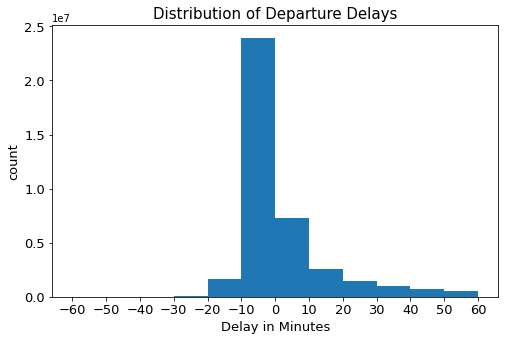

In [0]:
# Departure Delay (minutes) Distribution

import matplotlib.pyplot as plt

bins = [-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60]
bins, counts = df_airlines_full.select('DEP_DELAY').rdd.map(lambda x:(x[0])).histogram(bins)

fig, ax = plt.subplots(figsize=(8, 5))
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title("Distribution of Departure Delays", fontdict = {'fontsize' : 15})
plt.xlabel("Delay in Minutes", fontsize = 13)
plt.ylabel('count', fontsize = 13)
plt.xticks(bins)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.set_cmap("viridis")
plt.show()

In [0]:
delays = df_airlines_full.select("DEP_DELAY")

In [0]:
display(delays)

DEP_DELAY 0.0 -6.0 -1.0 -3.0 -2.0 -8.0 -1.0 -10.0 -1.0 -3.0 -4.0 0.0 -6.0 -5.0 -1.0 -4.0 -3.0 -6.0 -4.0 -2.0 -11.0 -4.0 -4.0 -10.0 -1.0 -4.0 -3.0 -4.0 -5.0 -2.0 -2.0 -15.0 -7.0 -3.0 -6.0 -4.0 -4.0 -5.0 0.0 -5.0 -7.0 -6.0 -3.0 -8.0 -1.0 0.0 -5.0 -10.0 -4.0 -9.0 -3.0 -5.0 -14.0 -4.0 -18.0 0.0 -1.0 -11.0 -8.0 -1.0 -5.0 -4.0 -4.0 -10.0 -6.0 -3.0 -3.0 -3.0 -1.0 -7.0 -2.0 -3.0 -4.0 0.0 -6.0 -6.0 0.0 -7.0 -1.0 -4.0 -8.0 -6.0 -6.0 -6.0 -12.0 -1.0 -9.0 -9.0 -3.0 -1.0 -12.0 0.0 -2.0 -2.0 -2.0 -6.0 -10.0 -3.0 -2.0 -3.0 -17.0 -8.0 -11.0 -1.0 -1.0 -3.0 -1.0 -1.0 0.0 -2.0 -3.0 -2.0 0.0 -5.0 0.0 -2.0 -6.0 -7.0 -1.0 -11.0 -3.0 -3.0 -7.0 -2.0 -1.0 -6.0 -6.0 -4.0 -11.0 0.0 -3.0 -6.0 -1.0 -1.0 -15.0 -4.0 -1.0 0.0 -10.0 -3.0 -1.0 -1.0 -9.0 -6.0 -9.0 -2.0 -7.0 -8.0 -15.0 -2.0 -4.0 -2.0 -8.0 -5.0 -3.0 -3.0 -3.0 -10.0 -3.0 -3.0 -4.0 -1.0 -5.0 -7.0 -5.0 -5.0 0.0 -5.0 -11.0 -1.0 -3.0 0.0 -8.0 -6.0 -15.0 -2.0 -12.0 -2.0 -6.0 -3.0 -3.0 0.0 -1.0 -5.0 -6.0 -4.0 -4.0 -3.0 -3.0 -1.0 -2.0 0.0 -6.0 0.0 -4.0 -5.0 -3.0 0.0 -4.0 -2.0 -2.0 -2.0 -6.0 -7.0 -4.0 -3.0 -2.0 -1.0 0.0 -4.0 -4.0 -6.0 -3.0 -3.0 -4.0 -10.0 -2.0 0.0 -14.0 -4.0 -1.0 -9.0 -16.0 -2.0 -9.0 -7.0 -4.0 -10.0 0.0 -7.0 -1.0 -6.0 -8.0 0.0 -1.0 -7.0 -2.0 -4.0 -10.0 -2.0 -1.0 -12.0 -3.0 -2.0 -7.0 -1.0 0.0 -4.0 -13.0 -6.0 -7.0 -4.0 -2.0 -5.0 -10.0 -4.0 -6.0 -9.0 -3.0 -1.0 -7.0 -14.0 -6.0 -5.0 -3.0 -3.0 -10.0 -3.0 -4.0 -14.0 0.0 -2.0 -2.0 -2.0 -6.0 -5.0 -15.0 -13.0 -3.0 -8.0 -2.0 -5.0 -2.0 -1.0 -3.0 -7.0 -7.0 -6.0 -4.0 -6.0 0.0 -6.0 -3.0 -7.0 0.0 -1.0 0.0 -7.0 -9.0 -6.0 0.0 0.0 -1.0 -6.0 -4.0 -8.0 -7.0 -9.0 -6.0 0.0 0.0 -6.0 -3.0 -5.0 -6.0 -5.0 -4.0 -5.0 -1.0 -8.0 -6.0 -6.0 -4.0 -2.0 0.0 -1.0 -7.0 -4.0 -10.0 -6.0 -4.0 -3.0 0.0 -7.0 -10.0 -5.0 -3.0 0.0 -1.0 -5.0 -4.0 -8.0 -4.0 -11.0 -2.0 -3.0 -3.0 -5.0 -4.0 -8.0 -6.0 -6.0 -3.0 -7.0 -2.0 -5.0 0.0 0.0 -1.0 0.0 -5.0 -6.0 -1.0 -5.0 -2.0 -12.0 -3.0 -5.0 -1.0 0.0 -4.0 -3.0 -4.0 -4.0 -5.0 -10.0 -5.0 -4.0 -1.0 -5.0 -4.0 -7.0 -8.0 -2.0 -4.0 -6.0 -7.0 -9.0 -1.0 -6.0 -1.0 -7.0 -1.0 -9.0 -1.0 -7.0 -4.0 -12.0 -3.0 -9.0 -1.0 -8.0 -8.0 -1.0 -1.0 -5.0 -2.0 -2.0 -2.0 -9.0 -5.0 -11.0 -7.0 -1.0 -3.0 -6.0 -1.0 -10.0 -6.0 -8.0 -2.0 -3.0 -8.0 -4.0 0.0 -4.0 -1.0 -8.0 -5.0 -1.0 -3.0 -4.0 0.0 -8.0 -4.0 -3.0 -4.0 -11.0 -2.0 -4.0 -4.0 -2.0 -3.0 -5.0 0.0 0.0 -7.0 -2.0 -4.0 -8.0 -8.0 -6.0 -7.0 -1.0 -5.0 -6.0 -3.0 -5.0 -7.0 -15.0 -4.0 -4.0 0.0 -8.0 0.0 -3.0 -3.0 0.0 -10.0 0.0 -1.0 -3.0 -2.0 -4.0 -4.0 -9.0 -2.0 -7.0 -3.0 -3.0 -8.0 -7.0 -11.0 -3.0 -8.0 0.0 -4.0 -5.0 0.0 -2.0 -6.0 0.0 -1.0 0.0 -2.0 -4.0 -6.0 -8.0 -2.0 -3.0 -7.0 -3.0 -6.0 0.0 -2.0 -2.0 -3.0 -1.0 -5.0 0.0 -6.0 0.0 -6.0 -1.0 -3.0 -4.0 -1.0 -5.0 -2.0 -6.0 -7.0 0.0 -1.0 -4.0 -13.0 0.0 -7.0 -5.0 -8.0 -3.0 -2.0 -3.0 -6.0 -5.0 -2.0 -6.0 0.0 -5.0 -3.0 -3.0 -8.0 -3.0 0.0 -2.0 -4.0 -1.0 -5.0 -4.0 0.0 -5.0 -1.0 -8.0 -3.0 -1.0 -2.0 0.0 -6.0 -4.0 -6.0 -8.0 -5.0 -4.0 -1.0 -3.0 -6.0 -2.0 -5.0 -3.0 0.0 0.0 -2.0 -1.0 -6.0 -6.0 0.0 -4.0 -5.0 -7.0 -3.0 -3.0 -7.0 -1.0 -8.0 -5.0 -7.0 -9.0 -6.0 -4.0 -5.0 0.0 -6.0 -3.0 -13.0 -4.0 -7.0 -4.0 -13.0 -7.0 -10.0 -5.0 -1.0 -3.0 -7.0 -4.0 -3.0 -2.0 -4.0 -4.0 -7.0 -1.0 -7.0 -7.0 -7.0 -6.0 -6.0 -2.0 -1.0 -9.0 -1.0 -5.0 -8.0 -3.0 -6.0 -5.0 -9.0 -5.0 -3.0 -7.0 -5.0 -7.0 0.0 -11.0 -3.0 -9.0 -1.0 0.0 -1.0 0.0 -5.0 -4.0 -3.0 -3.0 -5.0 -1.0 -11.0 -7.0 -5.0 -4.0 -8.0 -11.0 -3.0 -13.0 -2.0 -9.0 -4.0 -5.0 -3.0 -3.0 0.0 -10.0 -6.0 -7.0 -7.0 -6.0 -2.0 0.0 -5.0 -11.0 -5.0 -7.0 0.0 -8.0 -1.0 -17.0 -4.0 -7.0 -5.0 0.0 -2.0 -5.0 -1.0 -10.0 -8.0 -9.0 -5.0 -4.0 -5.0 -1.0 -23.0 -8.0 -3.0 -5.0 0.0 -19.0 -5.0 -5.0 -5.0 -1.0 -5.0 -3.0 -10.0 -5.0 -4.0 -6.0 -8.0 -3.0 0.0 0.0 -4.0 -4.0 -6.0 -1.0 -4.0 -2.0 -3.0 -6.0 -3.0 -6.0 -9.0 -5.0 -3.0 -2.0 -4.0 -5.0 -3.0 -7.0 -2.0 -3.0 -5.0 -2.0 -9.0 -11.0 -7.0 -3.0 -4.0 -8.0 -9.0 -2.0 0.0 -3.0 -5.0 -5.0 0.0 -8.0 -7.0 -5.0 -2.0 -6.0 -4.0 -9.0 -6.0 -6.0 -2.0 -20.0 -3.0 -3.0 -5.0 -2.0 -3.0 -3.0 -5.0 -9.0 -3.0 -5.0 -1.0 -2.0 -11.0 -9.0 -5.0 -10.0 -2.0 -15.0 -10.0 -5.0 -4.0 -3.0 -5.0 -3.0 -5.0 -7.0 -5.0 -2.0 -5.0 -2.0 -9.0 -3.0 -7.0 -7.0 0.0 -3.0 -11.0 0.0 0.0 -9.0 -14.0 -13.0 -12.0 -7.0 -7.0 -

Output can only be rendered in Databricks

In [0]:
df_airlines_full.count()

Out[36]: 41577397

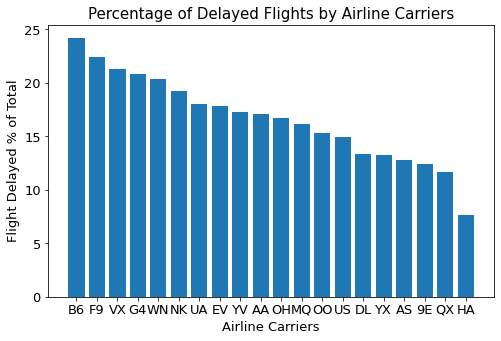

In [0]:
# airline carriers plot
df_carrier = df_airlines_full.groupBy("OP_CARRIER","DEP_DEL15").count().toPandas()
df_carrier['delay_percent'] = np.where(df_carrier.DEP_DEL15 == 1, df_carrier['count'] * 100 / df_carrier.groupby('OP_CARRIER')['count'].transform('sum'), 0)
df_carrier = df_carrier.sort_values(by='delay_percent',ascending=False)


fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(df_carrier['OP_CARRIER'],df_carrier['delay_percent'])
plt.title("Percentage of Delayed Flights by Airline Carriers", fontdict = {'fontsize' : 15})
plt.xlabel("Airline Carriers", fontsize = 13)
plt.ylabel('Flight Delayed % of Total', fontsize = 13)
# plt.xticks(bins)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

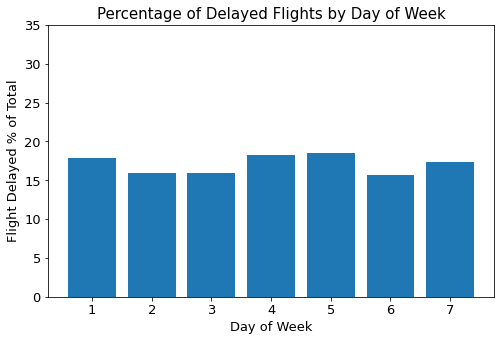

In [0]:
# DOW delay plot
df_DOW = df_airlines_full.groupBy("DAY_OF_WEEK","DEP_DEL15").count().toPandas()
df_DOW['delay_percent'] = np.where(df_DOW.DEP_DEL15 == 1, df_DOW['count'] * 100 / df_DOW.groupby('DAY_OF_WEEK')['count'].transform('sum'), 0)
# df_DOW = df_DOW.sort_values(by='delay_percent',ascending=False)


fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(df_DOW['DAY_OF_WEEK'],df_DOW['delay_percent'])
plt.title("Percentage of Delayed Flights by Day of Week", fontdict = {'fontsize' : 15})
plt.xlabel("Day of Week", fontsize = 13)
plt.ylabel('Flight Delayed % of Total', fontsize = 13)
# plt.xticks(bins)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim([0, 35])
plt.show()

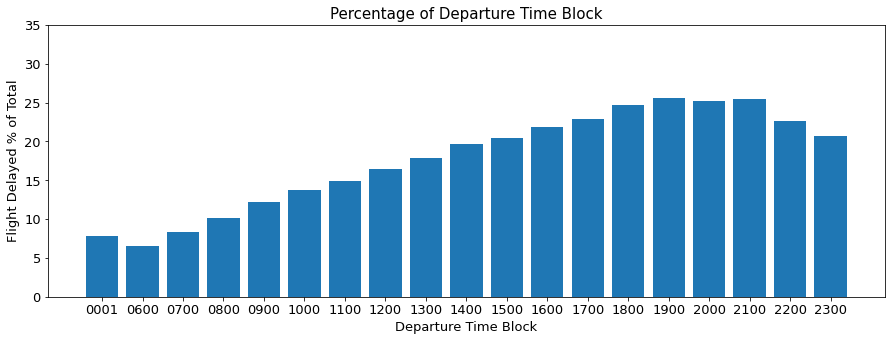

In [0]:
# DEP_TIME_BLK delay plot
from pyspark.sql.functions import substring

df_deptime = df_airlines_full.withColumn("HOUR_DEPT", substring('DEP_TIME_BLK',1,4)).groupBy("HOUR_DEPT","DEP_DEL15").count().toPandas()
df_deptime['delay_percent'] = np.where(df_deptime.DEP_DEL15 == 1, df_deptime['count'] * 100 / df_deptime.groupby('HOUR_DEPT')['count'].transform('sum'), 0)
df_deptime = df_deptime.sort_values(by='HOUR_DEPT',ascending=True)


fig, ax = plt.subplots(figsize=(15, 5))
plt.bar(df_deptime['HOUR_DEPT'],df_deptime['delay_percent'])
plt.title("Percentage of Departure Time Block", fontdict = {'fontsize' : 15})
plt.xlabel("Departure Time Block", fontsize = 13)
plt.ylabel('Flight Delayed % of Total', fontsize = 13)
# plt.xticks(bins)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim([0, 35])
plt.show()

In [0]:
df_deptime.sort_values(by='HOUR_DEPT')

HOUR_DEPT 
 DEP_DEL15 
 count 
 delay_percent 
 
 
 
 
 32 
 0001 
 NaN 
 75 
 0.000000 
 
 
 48 
 0001 
 1.0 
 79301 
 7.856189 
 
 
 38 
 0001 
 0.0 
 930032 
 0.000000 
 
 
 0 
 0600 
 0.0 
 2717237 
 0.000000 
 
 
 7 
 0600 
 NaN 
 352 
 0.000000 
 
 
 20 
 0600 
 1.0 
 189516 
 6.519063 
 
 
 53 
 0700 
 NaN 
 261 
 0.000000 
 
 
 36 
 0700 
 1.0 
 237279 
 8.347487 
 
 
 46 
 0700 
 0.0 
 2604980 
 0.000000 
 
 
 34 
 0800 
 NaN 
 314 
 0.000000 
 
 
 39 
 0800 
 1.0 
 287410 
 10.187661 
 
 
 24 
 0800 
 0.0 
 2533434 
 0.000000 
 
 
 26 
 0900 
 NaN 
 323 
 0.000000 
 
 
 2 
 0900 
 0.0 
 2207704 
 0.000000 
 
 
 17 
 0900 
 1.0 
 305609 
 12.158045 
 
 
 37 
 1000 
 1.0 
 361536 
 13.807611 
 
 
 15 
 1000 
 NaN 
 322 
 0.000000 
 
 
 40 
 1000 
 0.0 
 2256524 
 0.000000 
 
 
 11 
 1100 
 1.0 
 393783 
 14.950823 
 
 
 43 
 1100 
 0.0 
 2239760 
 0.000000 
 
 
 3 
 1100 
 NaN 
 312 
 0.000000 
 
 
 50 
 1200 
 0.0 
 2145207 
 0.000000 
 
 
 28 
 1200 
 1.0 
 424342 
 16.512049 
 
 
 16 
 1200 
 NaN 
 344 
 0.000000 
 
 
 25 
 1300 
 0.0 
 2052693 
 0.000000 
 
 
 5 
 1300 
 NaN 
 319 
 0.000000 
 
 
 12 
 1300 
 1.0 
 445854 
 17.842253 
 
 
 35 
 1400 
 0.0 
 1952132 
 0.000000 
 
 
 30 
 1400 
 NaN 
 265 
 0.000000 
 
 
 23 
 1400 
 1.0 
 477292 
 19.644160 
 
 
 52 
 1500 
 NaN 
 407 
 0.000000 
 
 
 22 
 1500 
 0.0 
 2029916 
 0.000000 
 
 
 14 
 1500 
 1.0 
 523360 
 20.494321 
 
 
 41 
 1600 
 NaN 
 263 
 0.000000 
 
 
 10 
 1600 
 1.0 
 527769 
 21.928445 
 
 
 31 
 1600 
 0.0 
 1878746 
 0.000000 
 
 
 29 
 1700 
 NaN 
 317 
 0.000000 
 
 
 6 
 1700 
 1.0 
 621876 
 22.879247 
 
 
 47 
 1700 
 0.0 
 2095886 
 0.000000 
 
 
 1 
 1800 
 0.0 
 1810874 
 0.000000 
 
 
 4 
 1800 
 1.0 
 593072 
 24.668390 
 
 
 44 
 1800 
 NaN 
 232 
 0.000000 
 
 
 33 
 1900 
 0.0 
 1659819 
 0.000000 
 
 
 27 
 1900 
 NaN 
 244 
 0.000000 
 
 
 19 
 1900 
 1.0 
 572547 
 25.644739 
 
 
 13 
 2000 
 0.0 
 1438758 
 0.000000 
 
 
 49 
 2000 
 1.0 
 484290 
 25.180945 
 
 
 9 
 2000 
 NaN 
 192 
 0.000000 
 
 
 18 
 2100 
 0.0 
 919612 
 0.000000 
 
 
 55 
 2100 
 NaN 
 146 
 0.000000 
 
 
 8 
 2100 
 1.0 
 314349 
 25.471778 
 
 
 54 
 2200 
 NaN 
 50 
 0.000000 
 
 
 45 
 2200 
 1.0 
 217382 
 22.702014 
 
 
 42 
 2200 
 0.0 
 740113 
 0.000000 
 
 
 21 
 2300 
 1.0 
 62771 
 20.739431 
 
 
 51 
 2300 
 0.0 
 239888 
 0.000000 
 
 
 56 
 2300 
 NaN 
 6 
 0.000000

In [0]:
df_stations2 = df_stations.select(['lat','lon']).distinct().collect()
display(df_stations2)

lat lon 65.567 -144.765 61.983 -152.083 67.566 -162.975 53.895 -166.543 33.967 -86.083 32.572 -116.979 36.029 -119.063 37.317 -79.974 45.698 -118.855 48.794 -122.537 41.516 -82.869 35.483 -81.161 32.334 -104.258 34.708 -77.44 43.111 -76.104 29.383 -98.583 38.753 -90.374 19.736 -156.049 48.884 -99.621 29.959 -81.34 39.84 -83.84 44.65 -111.1 34.033 -95.533 32.214 -83.128 29.11 -95.462 37.75 -92.15 39.135 -96.679 37.467 -122.117 28.617 -80.683 40.619 -111.993 37.168 -97.037 46.117 -89.883 48.383 -124.733 48.726 -116.295 42.242 -96.983 38.365 -82.555 36.023 -84.234 37.054 -84.615 34.65 -99.267 43.344 -72.518 30.336 -81.515 59.067 -160.367 32.71 -96.267 37.225 -89.571 34.629 -118.084 39.594 -84.226 47.967 -97.4 33.627 -116.159 27.267 -80.85 42.717 -71.124 33.816 -78.72 61.437 -142.904 56.247 -134.645 46.283 -96.15 31.917 -98.6 47.423 -98.106 46.768 -100.894 41.867 -87.6 41.552 -112.062 30.718 -91.479 33.623 -111.911 41.019 -89.386 39.991 -82.877 45.867 -111.967 35.6 -92.45 44.753 -95.556 30.183 -97.68 37.1 -113.6 37.064 -89.219 42.681 -91.974 41.259 -95.76 45.543 -94.051 47.683 -117.321 41.393 -70.615 40.85 -77.85 44.404 -118.963 19.76 -155.554 31.397 -84.895 41.226 -92.491 42.517 -108.783 33.917 -84.517 27.5 -97.817 43.212 -90.181 47.767 -116.817 36.859 -83.358 40.217 -76.851 44.381 -100.286 36.817 -76.033 44.917 -67.0 30.717 -87.017 61.1 -155.583 34.095 -82.816 33.85 -98.483 32.131 -110.955 36.432 -81.419 33.65 -88.45 40.601 -98.426 47.133 -104.8 47.208 -119.319 46.973 -122.903 35.582 -79.101 41.509 -74.265 40.183 -112.933 55.483 -133.15 21.487 -158.028 68.167 -151.767 59.45 -157.333 61.132 -146.244 27.812 -97.089 32.969 -96.836 34.988 -117.865 41.119 -101.768 43.156 -90.678 47.15 -122.483 38.515 -89.092 36.583 -115.683 45.648 -68.693 29.467 -81.206 26.178 -97.973 44.729 -96.266 32.3 -86.408 32.383 -86.35 29.951 -94.021 45.928 -89.731 48.094 -105.574 41.518 -81.684 29.248 -88.441 33.902 -87.314 35.433 -99.4 45.159 -93.843 31.152 -81.391 30.511 -99.766 36.2 -81.65 40.779 -73.88 38.308 -75.124 36.732 -119.82 46.531 -87.549 57.499 -134.586 36.855 -84.856 34.283 -80.567 31.666 -98.149 31.15 -97.417 36.0 -89.409 45.117 -95.083 62.785 -164.491 32.15 -94.85 29.947 -100.173 36.773 -90.325 36.283 -94.3 41.991 -93.619 44.889 -116.102 41.491 -120.564 21.324 -157.929 41.334 -75.727 43.108 -78.938 40.481 -107.218 44.534 -72.614 26.442 -98.129 43.548 -109.69 26.685 -80.099 28.654 -96.681 34.016 -118.451 40.436 -104.632 34.594 -83.296 44.5 -123.283 47.049 -91.745 37.183 -77.5 38.8 -97.65 37.733 -122.317 33.154 -83.241 38.533 -106.05 38.35 -93.683 35.937 -77.547 25.907 -80.28 35.946 -112.155 36.768 -96.026 39.294 -96.926 32.036 -102.101 41.717 -85.983 45.032 -102.019 21.45 -157.768 38.696 -121.59 31.267 -85.717 61.775 -161.319 28.861 -96.93 41.73 -98.054 41.178 -78.899 41.986 -97.435 39.49 -121.618 36.666 -76.321 29.183 -81.048 32.733 -96.967 62.65 -160.183 36.588 -121.845 31.114 -92.966 33.633 -85.15 32.782 -98.06 36.119 -86.689 33.979 -98.493 43.578 -96.754 40.158 -89.335 22.033 -159.783 30.219 -81.876 37.439 -105.861 27.779 -97.691 70.212 -151.002 26.933 -94.683 31.352 -100.495 38.323 -88.858 39.825 -86.296 39.528 -107.72 43.767 -99.318 33.038 -116.916 34.268 -77.9 40.918 -81.444 66.0 -153.7 36.605 -94.738 30.478 -87.187 33.923 -118.334 40.167 -103.217 36.903 -76.192 43.205 -71.503 42.783 -71.517 39.008 -74.908 33.6 -102.05 36.9 -106.583 48.467 -122.417 30.395 -97.567 32.609 -82.37 33.63 -84.442 33.875 -84.302 37.633 -118.85 45.101 -90.303 44.359 -89.837 38.379 -88.413 38.067 -122.5 32.917 -80.633 29.997 -90.278 33.206 -97.199 32.973 -97.318 33.417 -112.383 36.878 -91.903 34.558 -98.417 37.617 -97.267 42.074 -124.29 26.378 -80.108 28.917 -93.3 70.331 -149.598 44.333 -89.02 41.412 -96.109 38.55 -89.85 40.044 -107.889 41.781 -122.468 45.462 -69.595 44.051 -101.601 44.859 -94.382 37.85 -76.883 46.783 -100.757 38.687 -80.652 29.117 -91.867 59.642 -151.491 33.598 -83.139 27.916 -82.449 32.693 -100.951 31.8 -98.95 34.1 -117.783 37.78 -89.25 37.746 

In [0]:
df_delay_cause = df_airlines.select('FLIGHT_TIMESTAMP',
                                    "YEAR", 
                                    "MONTH",
                                    "DAY_OF_MONTH",
                                    'CANCELLED',
                                    'DEP_DELAY',
                                    'CARRIER_DELAY',
                                    'WEATHER_DELAY',
                                    'NAS_DELAY',
                                    'SECURITY_DELAY',
                                    'LATE_AIRCRAFT_DELAY') \
                            .filter(col('DEP_DELAY') >= 15).fillna(0, subset=["CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"])
df_delay_cause

Out[7]: DataFrame[FLIGHT_TIMESTAMP: timestamp, YEAR: int, MONTH: int, DAY_OF_MONTH: int, CANCELLED: double, DEP_DELAY: double, CARRIER_DELAY: double, WEATHER_DELAY: double, NAS_DELAY: double, SECURITY_DELAY: double, LATE_AIRCRAFT_DELAY: double]

In [0]:
# cols_to_select = [col for col in df_airlines where col.contains('DEL')]
# display(df_airlines.filter(col("NAS_DELAY") == 45).select(cols_to_select))

In [0]:
display(df_delay_cause.take(5))

FLIGHT_TIMESTAMP YEAR MONTH DAY_OF_MONTH CANCELLED DEP_DELAY CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY 2015-02-04T03:55:00.000+0000 2015 2 3 0.0 51.0 0.0 51.0 30.0 0.0 0.0 2015-02-16T15:39:00.000+0000 2015 2 16 0.0 114.0 0.0 0.0 12.0 0.0 114.0 2015-02-18T14:00:00.000+0000 2015 2 18 0.0 41.0 40.0 0.0 0.0 0.0 0.0 2015-02-02T20:35:00.000+0000 2015 2 2 0.0 161.0 54.0 0.0 0.0 0.0 106.0 2015-07-04T19:06:00.000+0000 2015 7 4 0.0 53.0 43.0 0.0 0.0 0.0 0.0

In [0]:
df_delay_cause = df_delay_cause.withColumn('TOTAL_DELAY', (col('CARRIER_DELAY') + col('WEATHER_DELAY') + col('NAS_DELAY') + col('SECURITY_DELAY') + col('LATE_AIRCRAFT_DELAY')))
df_delay_cause = df_delay_cause.withColumn('DELAY_DIFF',  col('DEP_DELAY')  - col('TOTAL_DELAY'))

In [0]:
dbutils.data.summarize(df_delay_cause.select([c for c in df_delay_cause.columns if c not in {'FLIGHT_TIMESTAMP'}]))

---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
<command-1020093804833188> in <cell line: 1>()
----> 1 dbutils.data.summarize(df_delay_cause.select([c for c in df_delay_cause.columns if c not in {'FLIGHT_TIMESTAMP'}]))

/databricks/python_shell/dbruntime/datautils/DataHandler.py in summarize(self, df, precise)
     36             if df.isStreaming:
     37                 raise Exception("Spark Streaming inputs are not supported.")
---> 38             return self.displayHTML(self.entry_point.getDbutils().data().getSummaryHTML(
     39                 df._jdf, precise))
     40 

/databricks/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py in __call__(self, *args)
   1319 
   1320         answer = self.gateway_client.send_command(command)
-> 1321         return_value = get_return_value(
   1322             answer, self.gateway_client, self.target_id, self.name)
   1323 

/d

In [0]:
display(df_delay_cause.select(sum('TOTAL_DELAY')))

org.apache.spark.SparkException: Job aborted due to stage failure: Task 182 in stage 42.0 failed 4 times, most recent failure: Lost task 182.3 in stage 42.0 (TID 1334) (10.139.64.24 executor 1): java.lang.NullPointerException

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:3271)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:3203)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:3194)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:3194)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1421)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1421)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1421)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3483)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:3421)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:3409)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:51)
Caused by: java.lang.NullPointerException

In [0]:
display(df_delay_cause.select(sum('DEP_DELAY')))

org.apache.spark.SparkException: Job aborted due to stage failure: Task 195 in stage 44.0 failed 4 times, most recent failure: Lost task 195.3 in stage 44.0 (TID 1540) (10.139.64.23 executor 2): java.lang.NullPointerException

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:3271)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:3203)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:3194)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:3194)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1421)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1421)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1421)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3483)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:3421)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:3409)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:51)
Caused by: java.lang.NullPointerException

In [0]:
# df_delay_cause.filter(col("DELAY_DIFF") != 0).count() , df_delay_cause.select(mean("DELAY_DIFF")).collect()

In [0]:
display(df_delay_cause.take(10))

FLIGHT_TIMESTAMP YEAR MONTH DAY_OF_MONTH CANCELLED DEP_DELAY CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY TOTAL_DELAY DELAY_DIFF 2015-02-04T03:55:00.000+0000 2015 2 3 0.0 51.0 0.0 51.0 30.0 0.0 0.0 81.0 -30.0 2015-02-16T15:39:00.000+0000 2015 2 16 0.0 114.0 0.0 0.0 12.0 0.0 114.0 126.0 -12.0 2015-02-18T14:00:00.000+0000 2015 2 18 0.0 41.0 40.0 0.0 0.0 0.0 0.0 40.0 1.0 2015-02-02T20:35:00.000+0000 2015 2 2 0.0 161.0 54.0 0.0 0.0 0.0 106.0 160.0 1.0 2015-07-04T19:06:00.000+0000 2015 7 4 0.0 53.0 43.0 0.0 0.0 0.0 0.0 43.0 10.0 2015-02-21T20:55:00.000+0000 2015 2 21 0.0 48.0 0.0 0.0 0.0 0.0 41.0 41.0 7.0 2015-02-09T13:30:00.000+0000 2015 2 9 0.0 23.0 0.0 0.0 66.0 0.0 0.0 66.0 -43.0 2015-02-09T12:11:00.000+0000 2015 2 9 0.0 25.0 25.0 0.0 25.0 0.0 0.0 50.0 -25.0 2015-07-28T21:51:00.000+0000 2015 7 28 0.0 34.0 0.0 0.0 0.0 0.0 15.0 15.0 19.0 2015-07-28T20:23:00.000+0000 2015 7 28 0.0 115.0 0.0 14.0 2.0 0.0 101.0 117.0 -2.0

In [0]:
df_delay_cause.select('YEAR','DEP_DELAY','TOTAL_DELAY','DELAY_DIFF',
                                    'CARRIER_DELAY',
                                    'WEATHER_DELAY',
                                    'NAS_DELAY',
                                    'SECURITY_DELAY',
                                    'LATE_AIRCRAFT_DELAY').groupby("YEAR")

Out[16]: <pyspark.sql.group.GroupedData at 0x7f30c4e29370>

In [0]:
df_delay_cause_yrly = df_delay_cause.select('YEAR','DEP_DELAY','TOTAL_DELAY','DELAY_DIFF',
                                    'CARRIER_DELAY',
                                    'WEATHER_DELAY',
                                    'NAS_DELAY',
                                    'SECURITY_DELAY',
                                    'LATE_AIRCRAFT_DELAY').groupby("YEAR").sum()
df_delay_cause_yrly = df_delay_cause_yrly.withColumn("pct_CARRIER_DELAY", 100 * col('sum(CARRIER_DELAY)')/col('sum(TOTAL_DELAY)'))
df_delay_cause_yrly = df_delay_cause_yrly.withColumn("pct_WEATHER_DELAY", 100 * col('sum(WEATHER_DELAY)')/col('sum(TOTAL_DELAY)'))
df_delay_cause_yrly = df_delay_cause_yrly.withColumn("pct_NAS_DELAY", 100 * col('sum(NAS_DELAY)')/col('sum(TOTAL_DELAY)'))
df_delay_cause_yrly = df_delay_cause_yrly.withColumn("pct_SECURITY_DELAY", 100 * col('sum(SECURITY_DELAY)')/col('sum(TOTAL_DELAY)'))
df_delay_cause_yrly = df_delay_cause_yrly.withColumn("pct_LATE_AIRCRAFT_DELAY", 100 * col('sum(LATE_AIRCRAFT_DELAY)')/col('sum(TOTAL_DELAY)'))
df_delay_cause_yrly = df_delay_cause_yrly.withColumn("pct_ALL_CAUSES", col("pct_CARRIER_DELAY") + col("pct_WEATHER_DELAY") + col("pct_NAS_DELAY") + col("pct_SECURITY_DELAY")+ col("pct_LATE_AIRCRAFT_DELAY"))
# %_columns = [column for column in df_delay_cause_yrly.columns if column.startswith("pct_")]
# df_delay_cause_yrly = df_delay_cause_yrly.select(selected_columns)


In [0]:
df_delay_cause_yrly.select("YEAR","pct_CARRIER_DELAY","pct_WEATHER_DELAY","pct_NAS_DELAY","pct_SECURITY_DELAY","pct_LATE_AIRCRAFT_DELAY").show()#, "pct_ALL_CAUSES"))

+----+------------------+-----------------+------------------+-------------------+-----------------------+
|YEAR| pct_CARRIER_DELAY|pct_WEATHER_DELAY|     pct_NAS_DELAY| pct_SECURITY_DELAY|pct_LATE_AIRCRAFT_DELAY|
+----+------------------+-----------------+------------------+-------------------+-----------------------+
|2018|32.486061356854975|6.126753055076157| 17.80592181253192|0.15235844676224997|       43.4289053287747|
|2015| 34.72878540907606|5.365156570939749|16.091202421358833| 0.1329123292930823|      43.68194326933228|
|2019|32.842125263960426|5.945791805402936|17.923019415656956|0.14632164165124373|      43.14274187332843|
|2020|46.036924681481764|7.855169550060215|12.865454655657686| 0.2538434435576843|     32.988607669242654|
|2016| 35.21084262688317|4.703110097151771|17.056881057671006|0.14170236931725347|       42.8874638489768|
|2017| 33.49151309469986|4.593004461348649| 18.87478760659476| 0.1500635758573107|     42.890631261499415|
|2021| 43.02291403323208|7.4146406810

### WEATHER DELAY is encoded for "severe" weather delays and likely underestimates total delays in minutes from WEATHER.

In [0]:
'''
How many flights were really delayed by weather?
A true picture of total weather-related delays requires several steps. First, the extreme weather delays must be combined with the NAS weather category. Second, a calculation must be made to determine the weather-related delays included in the "late-arriving aircraft" category. Airlines do not report the causes of the late-arriving aircraft but an allocation can be made using the proportion of weather related-delays and total flights in the other categories. Adding the weather-related delays to the extreme weather and NAS weather categories would result in weather's share of all flight delays.

Source:
https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations

'''

'''
A flight is considered delayed when it arrived 15 or more minutes than the schedule (see definitions in Frequently Asked Questions). Delayed minutes are calculated for delayed flights only.
Weather delay in this section is the sum of Extreme Weather delays, NAS delays caused by the weather as assigned by the FAA (see National Aviation System Delay by Cause), and the Weather's pro-rata share of late-arriving-aircraft delays based on delay minutes.
No detailed data is available for a specific carreir at a specific airport.

SOURCE: Bureau of Transportation Statistics, Airline Service Quality Performance 234 and Federal Aviation Administration OPSNET
'''
WEATHER_NAS_15 = 0.6444
WEATHER_NAS_16 = 0.66
WEATHER_NAS_17 = 0.6325
WEATHER_NAS_18 = 0.6796
WEATHER_NAS_19 = 0.6986
WEATHER_NAS_20 = 0.5616
WEATHER_NAS_21 = 0.5917


df_delay_cause_yrly = df_delay_cause_yrly.withColumn("pct_NAS_DELAY_weather", when(df_delay_cause_yrly.YEAR == 2015, col("pct_NAS_DELAY") * WEATHER_NAS_15)
                                                                             .when(df_delay_cause_yrly.YEAR == 2016, col("pct_NAS_DELAY") * WEATHER_NAS_16)
                                                                             .when(df_delay_cause_yrly.YEAR == 2017, col("pct_NAS_DELAY") * WEATHER_NAS_17)
                                                                             .when(df_delay_cause_yrly.YEAR == 2018, col("pct_NAS_DELAY") * WEATHER_NAS_18)
                                                                             .when(df_delay_cause_yrly.YEAR == 2019, col("pct_NAS_DELAY") * WEATHER_NAS_19)
                                                     .when(df_delay_cause_yrly.YEAR == 2020, col("pct_NAS_DELAY") * WEATHER_NAS_20)
                                                     .when(df_delay_cause_yrly.YEAR == 2021, col("pct_NAS_DELAY") * WEATHER_NAS_21))
df_delay_cause_yrly = df_delay_cause_yrly.withColumn("pct_LATE_AIRCRAFT_DELAY_weather", col("pct_LATE_AIRCRAFT_DELAY") * (col("pct_NAS_DELAY_weather") + col("pct_WEATHER_DELAY"))/100)
df_delay_cause_yrly = df_delay_cause_yrly.withColumn("pct_WEATHER_DELAY_adj", col("pct_WEATHER_DELAY") + col("pct_NAS_DELAY_weather") + col("pct_LATE_AIRCRAFT_DELAY_weather"))


In [0]:
df_delay_cause_yrly_adj = df_delay_cause_yrly.select("pct_WEATHER_DELAY","pct_NAS_DELAY_weather","pct_LATE_AIRCRAFT_DELAY_weather","pct_WEATHER_DELAY_adj")

df_delay_cause_yrly_adj.withColumnRenamed("pct_WEATHER_DELAY","Extreme Weather (%)") \
                       .withColumnRenamed("pct_NAS_DELAY_weather","NAS Related to Weather (%)") \
                       .withColumnRenamed("pct_LATE_AIRCRAFT_DELAY_weather","Late-arriving Aircraft Related to Weather (%)") \
                       .withColumnRenamed("pct_WEATHER_DELAY_adj","Total Weather (%)").show()

+-------------------+--------------------------+---------------------------------------------+------------------+
|Extreme Weather (%)|NAS Related to Weather (%)|Late-arriving Aircraft Related to Weather (%)| Total Weather (%)|
+-------------------+--------------------------+---------------------------------------------+------------------+
|  6.126753055076157|        12.100904463796693|                            7.916072127524573| 26.14372964639742|
|  5.365156570939749|        10.369170840323632|                            6.873059973599068| 22.60738738486245|
|  5.945791805402936|         12.52102136377795|                            7.967089537809531|26.433902706990416|
|  7.855169550060215|         7.225239334617356|                            4.974816921883896|20.055225806561467|
|  4.703110097151771|        11.257541498062865|                            6.845118682958815| 22.80577027817345|
|  4.593004461348649|        11.938303161171186|                            7.0903821950

## Holiday Travelling

In [0]:
# https://stackoverflow.com/questions/2394235/detecting-a-us-holiday

# import holidays

In [0]:
# us_holidays = holidays.US()
# print(us_holidays.get('01-01-2018'))
# print('01-01-2018' in us_holidays)

In [0]:
# for ptr in holidays.US(years = 2018).items():
#   print(ptr)

In [0]:
from itertools import chain


# SOurce: https://www.transtats.bts.gov/holidaydelay.asp

HOLIDAY_DATEPAIRS = [('2015-02-15','2015-02-17'), ('2016-02-11','2016-02-16'),('2017-02-16','2017-02-21'),('2018-02-15','2018-02-20'),
('2019-02-14','2019-02-19'),('2020-02-13','2020-02-18'),('2021-02-11','2021-02-16'),('2015-03-29','2015-04-12'),('2016-03-20','2016-04-03'),('2017-04-09','2017-04-23'),('2018-03-25','2018-04-08'),('2019-03-15','2019-03-29'),('2020-04-05','2020-04-19'),('2021-03-28','2021-04-11'),('2015-05-18','2015-05-27'),('2016-05-23','2016-06-01'),('2017-05-22','2017-05-31'),('2018-05-21','2018-05-30'),('2019-05-20','2019-05-29'),('2020-05-18','2020-05-27'),('2021-05-24','2021-06-02'),('2015-06-26','2015-07-05'),('2016-07-01','2016-07-10'),('2017-07-01','2017-07-10'),('2018-06-29','2018-07-08'),('2019-06-28','2019-07-07'),('2020-06-26','2020-07-05'),('2021-07-02','2021-07-11'),('2015-09-02','2015-09-09'),('2016-08-31','2016-09-07'),('2017-08-30','2017-09-06'),('2018-08-29','2018-09-05'),('2019-08-28','2019-09-04'),('2020-09-02','2020-09-09'),('2021-09-01','2021-09-08'),('2015-11-20','2015-12-01'),('2016-11-18','2016-11-29'),('2017-11-17','2017-11-28'),('2018-11-16','2018-11-27'),('2019-11-22','2019-12-03'),('2020-11-20','2020-12-01'),('2021-11-19','2021-11-30'),('2015-12-16','2016-01-05'),('2016-12-15','2017-01-04'),('2017-12-14','2018-01-03'),('2018-12-14','2019-01-03'),('2019-12-14','2020-01-03'),('2020-12-16','2020-01-05'),('2021-12-15','2021-01-04')]

In [0]:
def daterange(date1, date2):
    date_list = []
    for n in range(int ((date2 - date1).days)+1):
         date_list.append(date1 + timedelta(n) )
    return date_list

GLOBAL_HOLIDAYS = []

for datepair in HOLIDAY_DATEPAIRS:
  start_date, end_date = datetime.strptime(datepair[0], '%Y-%m-%d'), datetime.strptime(datepair[1], '%Y-%m-%d') 
  GLOBAL_HOLIDAYS.append([dt.strftime("%Y-%m-%d") for dt in daterange(start_date, end_date)])
  
  
GLOBAL_HOLIDAY_LIST = list(chain(*GLOBAL_HOLIDAYS))  

In [0]:
# df_airlines = df_airlines.withColumn("HOLIDAY", col("FL_DATE").isin(GLOBAL_HOLIDAY_LIST))
df_airlines = df_airlines.withColumn("HOLIDAY", when(col("FL_DATE").isin(GLOBAL_HOLIDAY_LIST), 1)
                                     .otherwise(0) )


In [0]:
# display(df_airlines)

In [0]:
# flight holiday plot
df_holidays = df_airlines.na.fill(value=0,subset=["DEP_DEL15"])
df_holidays = df_holidays.select("HOLIDAY","DEP_DEL15","YEAR").groupBy("HOLIDAY","DEP_DEL15","YEAR").count().toPandas()
df_holidays['delay_percent'] = np.where(df_holidays.DEP_DEL15 == 1, df_holidays['count'] * 100 / df_holidays.groupby('HOLIDAY')['count'].transform('sum'), 0)
df_holidays = df_holidays.sort_values(by='delay_percent',ascending=False)


# import plotly.graph_objects as go

# fig_3_a = go.Figure(data=[go.Bar(
#                     x=df['date'],
#                     y=df['value'],
#                     text=df['category'],
#                     textposition='auto', 
#                     orientation ='v',
#                     )],
#                     layout=go.Layout(barmode='group'))

In [0]:
display(df_holidays)

HOLIDAY DEP_DEL15 YEAR count delay_percent 1 1.0 2019 301385 4.357014853909856 1 1.0 2018 296511 4.2865531839596045 1 1.0 2016 242886 3.5113157914519615 1 1.0 2015 232917 3.3671975338126385 1 1.0 2017 225475 3.2596112088701323 0 1.0 2019 1060779 2.986986079265502 0 1.0 2021 1024645 2.8852384438125194 0 1.0 2018 1009924 2.843786433475901 0 1.0 2015 824637 2.3220475136171306 0 1.0 2017 788370 2.2199253711758473 0 1.0 2016 710657 2.0010978404857034 0 1.0 2020 401152 1.1295806569224265 1 0.0 2016 1013503 0.0 0 0.0 2017 3618286 0.0 0 0.0 2021 4970752 0.0 1 0.0 2019 1337343 0.0 0 0.0 2016 3650612 0.0 0 0.0 2019 4722530 0.0 1 0.0 2018 1295133 0.0 0 0.0 2018 4611878 0.0 1 0.0 2015 929593 0.0 1 0.0 2017 1042490 0.0 0 0.0 2015 3831932 0.0 0 0.0 2020 4287202 0.0

In [0]:
test_set = spark.read.parquet(f"{blob_url}/test_set")

In [0]:
display(test_set)

QUARTER MONTH DAY_OF_MONTH DAY_OF_WEEK FL_DATE OP_UNIQUE_CARRIER OP_CARRIER_AIRLINE_ID TAIL_NUM ORIGIN_AIRPORT_ID ORIGIN ORIGIN_STATE_ABR DEST_AIRPORT_ID DEST DEST_STATE_ABR CRS_DEP_TIME DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 DEP_DELAY_GROUP DEP_TIME_BLK CRS_ARR_TIME ARR_TIME ARR_DELAY ARR_DELAY_NEW ARR_DEL15 ARR_DELAY_GROUP ARR_TIME_BLK CANCELLED DIVERTED DISTANCE DISTANCE_GROUP CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY YEAR ORIGIN_icao ORIGIN_iata ORIGIN_airport_name ORIGIN_airport_city ORIGIN_airport_subd ORIGIN_airport_country ORIGIN_elevation ORIGIN_airport_lat ORIGIN_airport_lon ORIGIN_airport_tz flight_id ORIGIN_FLIGHT_TIMESTAMP HOUR_WEATHER_TIMESTAMP WEATHER_TIMESTAMP TWO_HOUR_WEATHER_TIMESTAMP THREE_HOUR_WEATHER_TIMESTAMP ORIGIN_STATION_ID ORIGIN_STATION_NAME ORIGIN_STATION_ELEVATION ORIGIN_STATION_LATITUDE ORIGIN_STATION_LONGITUDE ORIGIN_WEATHER_DATE ORIGIN_WEATHER_REPORT_TYPE ORIGIN_WEATHER_SOURCE ORIGIN_HourlyPrecipitation ORIGIN_HourlyPresentWeatherType ORIGIN_STATION_TIMESTAMP HOUR_TIMESTAMP ORIGIN_HourlyDewPointTemperature ORIGIN_HourlyDryBulbTemperature ORIGIN_HourlyWetBulbTemperature ORIGIN_HourlyStationPressure ORIGIN_HourlyWindDirection ORIGIN_HourlyWindSpeed ORIGIN_HourlyVisibility ORIGIN_AU_code ORIGIN_AW_code ORIGIN_MW_code ORIGIN_AU_TS ORIGIN_AU_ICE ORIGIN_AU_SNOW ORIGIN_AU_FOG ORIGIN_AW_TS ORIGIN_AW_ICE ORIGIN_AW_SNOW ORIGIN_AW_FOG ORIGIN_MW_TS ORIGIN_MW_ICE ORIGIN_MW_SNOW ORIGIN_MW_FOG ORIGIN_TS ORIGIN_ICE ORIGIN_SNOW ORIGIN_FOG DEST_icao DEST_iata DEST_airport_name DEST_airport_city DEST_airport_subd DEST_airport_country DEST_elevation DEST_airport_lat DEST_airport_lon DEST_airport_tz DEST_STATION_ID DEST_STATION_NAME DEST_STATION_ELEVATION DEST_STATION_LATITUDE DEST_STATION_LONGITUDE DEST_WEATHER_DATE DEST_WEATHER_REPORT_TYPE DEST_WEATHER_SOURCE DEST_HourlyPrecipitation DEST_HourlyPresentWeatherType DEST_STATION_TIMESTAMP DEST_HourlyDewPointTemperature DEST_HourlyDryBulbTemperature DEST_HourlyWetBulbTemperature DEST_HourlyStationPressure DEST_HourlyWindDirection DEST_HourlyWindSpeed DEST_HourlyVisibility DEST_AU_code DEST_AW_code DEST_MW_code DEST_AU_TS DEST_AU_ICE DEST_AU_SNOW DEST_AU_FOG DEST_AW_TS DEST_AW_ICE DEST_AW_SNOW DEST_AW_FOG DEST_MW_TS DEST_MW_ICE DEST_MW_SNOW DEST_MW_FOG DEST_TS DEST_ICE DEST_SNOW DEST_FOG ARRIVAL_FLIGHT_TIMESTAMP PREV_DEP_DELAY PREV_DEPARTURE_TIMESTAMP PREV_ARR_DELAY PREV_ARRIVAL_TIMESTAMP 1 1 2 6 2021-01-02 00:00:00 G4 20368 281NV 10466 AZA AZ 10676 BLV IL 1620 1627 7.0 7.0 0.0 0 1600-1659 2010 2023 13.0 13.0 0.0 0 2000-2059 0.0 0.0 1272.0 6 0.0 0.0 0.0 0.0 0.0 2021 KIWA AZA Phoenix-Mesa-Gateway Airport Phoenix Arizona US 1382.0 33.30780029 -111.6549988 America/Phoenix 197569089841 2021-01-02T23:20:00.000+0000 2021010221 2021-01-02T21:20:00.000+0000 2021010220 2021010219 72278623104 PHOENIX WILLIAMS GATEWAY AIRPORT, AZ US 421.2 33.3 -111.66667 2021-01-02T13:50:00 FM-15 7 0.0 null 2021-01-02T20:50:00.000+0000 2021010220 21.0 59.0 43.0 28.73 320.0 5.0 10.0 null null null 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 KBLV BLV Scott AFB/Midamerica Airport Belleville Illinois US 459.0 38.54520035 -89.83519745 America/Chicago 72433813802 BELLEVILLE SCOTT AFB, IL US 135.0 38.55 -89.85 2021-01-02T15:04:00 FM-15 7 0.0 null 2021-01-02T21:04:00.000+0000 34.0 34.0 34.0 29.51 40.0 3.0 9.0 null null null 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2021-01-03T02:10:00.000+0000 99.0 2020-12-31T18:23:00.000+0000 82.0 2020-12-31T22:16:00.000+0000 1 1 2 6 2021-01-02 00:00:00 G4 20368 281NV 10676 BLV IL 10466 AZA AZ 2055 2103 8.0 8.0 0.0 0 2000-2059 2320 2337 17.0 17.0 1.0 1 2300-2359 0.0 0.0 1272.0 6 9.0 0.0 8.0 0.0 0.0 2021 KBLV BLV Scott AFB/Midamerica Airport Belleville Illinois US 459.0 38.54520035 -89.83519745 America/Chicago 231929084023 2021-01-03T02:55:00.000+0000 2021010300 2021-01-03T00:55:00.000+0000 2021010223 2021010222 72433813802 BELLEVILLE SCOTT AFB, IL US 135.0 38.55 -89.85 2021-01-02T18:52:00 FM-15 7 0.0 null 2021-01-03T00:52:00.000+0000 2021010300 34.0 34.0 34